In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d HimanshuPoddar/zomato-bangalore-restaurants

zomato-bangalore-restaurants.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#!unzip /content/zomato-bangalore-restaurants.zip

# **Import Libraries**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv('/content/zomato.csv')

In [8]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# **Data Cleaning**

In [10]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

* rate---------------7775
* phone--------------1208
* location-----------21
* rest_type----------227
* dish_liked---------28078
* cuisines-----------45
* approx_cost(for two people)---346

**Cuisines**

In [11]:
data['cuisines'].isnull().sum()

45

In [12]:
data.dropna(subset='cuisines',inplace=True)

In [13]:
data['cuisines'].isnull().sum()

0

**Rate** **Column**

In [14]:
data["rate"].isnull().sum()

7741

In [15]:
data["Rating"]=data["rate"].str.split("/").str[0]


In [16]:
data["Rating"].isnull().sum()

7741

In [17]:
data["Rating"]=pd.to_numeric(data["Rating"],errors='coerce')

In [18]:
data.Rating.isnull().sum()

10018

In [19]:
data["Rating"].fillna(data.Rating.mean().round(1),inplace = True)

In [20]:
data['Rating']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    3.7
51714    3.7
51715    4.3
51716    3.4
Name: Rating, Length: 51672, dtype: float64

In [21]:
data.Rating.isnull().sum()

0

In [22]:
data.drop('rate',axis=1,inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51672 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51672 non-null  object 
 1   address                      51672 non-null  object 
 2   name                         51672 non-null  object 
 3   online_order                 51672 non-null  object 
 4   book_table                   51672 non-null  object 
 5   votes                        51672 non-null  int64  
 6   phone                        50493 non-null  object 
 7   location                     51672 non-null  object 
 8   rest_type                    51466 non-null  object 
 9   dish_liked                   23639 non-null  object 
 10  cuisines                     51672 non-null  object 
 11  approx_cost(for two people)  51352 non-null  object 
 12  reviews_list                 51672 non-null  object 
 13  menu_item       

**Phone Column**

In [24]:
data.phone.isnull().sum()

1179

In [25]:
data.phone.fillna("XXXXXXXXXX",inplace=True)

In [26]:
data.phone.isnull().sum()

0

Drop null values in Location

In [27]:
data.location.isnull().sum()

0

**rest_type----------227**

In [28]:
data.rest_type.isnull().sum()

206

In [29]:
data.dropna(subset=["rest_type"],inplace=True)

approx_cost(for two people)---346

Cost

In [30]:
data.rename(columns={"approx_cost(for two people)": "Cost"}, inplace=True)

In [31]:
data.Cost.isnull().sum()

318

In [32]:
data['Cost'] = pd.to_numeric(data['Cost'].str.replace(',', ''), errors='coerce').fillna(data['Cost'].mode().iloc[0])

In [33]:
data.Cost=data.Cost.astype(int)

In [34]:
data.Cost.head(1)

0    800
Name: Cost, dtype: int64

In [35]:
data.drop('dish_liked',axis=1,inplace=True)

In [36]:
data.drop('menu_item',axis=1,inplace=True)

In [37]:
data.isnull().sum()

url                0
address            0
name               0
online_order       0
book_table         0
votes              0
phone              0
location           0
rest_type          0
cuisines           0
Cost               0
reviews_list       0
listed_in(type)    0
listed_in(city)    0
Rating             0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51466 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              51466 non-null  object 
 1   address          51466 non-null  object 
 2   name             51466 non-null  object 
 3   online_order     51466 non-null  object 
 4   book_table       51466 non-null  object 
 5   votes            51466 non-null  int64  
 6   phone            51466 non-null  object 
 7   location         51466 non-null  object 
 8   rest_type        51466 non-null  object 
 9   cuisines         51466 non-null  object 
 10  Cost             51466 non-null  int64  
 11  reviews_list     51466 non-null  object 
 12  listed_in(type)  51466 non-null  object 
 13  listed_in(city)  51466 non-null  object 
 14  Rating           51466 non-null  float64
dtypes: float64(1), int64(2), object(12)
memory usage: 6.3+ MB


**Duplicates Checking**

In [39]:
data.duplicated().sum()

0

Important columns:


1.   rest_type
2.   Cuisines
3.   reviews_list



# Preprocessing

In [40]:
from sklearn.preprocessing import MinMaxScaler
data['Mean Rating'] = data.groupby('name')['Rating'].transform('mean').round(2)
scaler = MinMaxScaler(feature_range=(1, 5))
data['Mean Rating'] = scaler.fit_transform(data[['Mean Rating']]).round(2)

In [41]:
data.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,cuisines,Cost,reviews_list,listed_in(type),listed_in(city),Rating,Mean Rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1,3.99
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1,3.97
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8,3.58
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7,3.45
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8,3.58


In [42]:
data_unique = data.drop_duplicates(subset=['name', 'location'], keep='first')

In [43]:
data_unique.shape

(12083, 16)

In [44]:
data_unique.reviews_list=data_unique.reviews_list.str.lower()

<ipython-input-44-fb578a959916>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique.reviews_list=data_unique.reviews_list.str.lower()


In [45]:
#Remove puntuations
import string
punc_to_remove=string.punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', punc_to_remove))
data_unique["reviews_list"] = data_unique["reviews_list"].apply(lambda text: remove_punctuation(text))

<ipython-input-45-8ec49f79eec8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique["reviews_list"] = data_unique["reviews_list"].apply(lambda text: remove_punctuation(text))


In [46]:
# import pandas as pd

# # Assuming data_unique is your DataFrame
# # Replace 'rest_type' with the actual column name in your DataFrame
# t = data_unique['rest_type'].str.split(',').explode().unique().tolist()


In [47]:
data_unique.reviews_list[0]

'rated 40 ratedn  a beautiful place to dine inthe interiors take you back to the mughal era the lightings are just perfectwe went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at allthe only complaint is that the breads could have been betterwould surely like to come here again rated 40 ratedn  i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangoutncheers rated 20 ratedn  its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte i

In [48]:
df=data_unique[data_unique['votes']>50]

In [49]:
df.shape

(4625, 16)

In [50]:
df.isnull().sum()

url                0
address            0
name               0
online_order       0
book_table         0
votes              0
phone              0
location           0
rest_type          0
cuisines           0
Cost               0
reviews_list       0
listed_in(type)    0
listed_in(city)    0
Rating             0
Mean Rating        0
dtype: int64

# **Data Visualization**

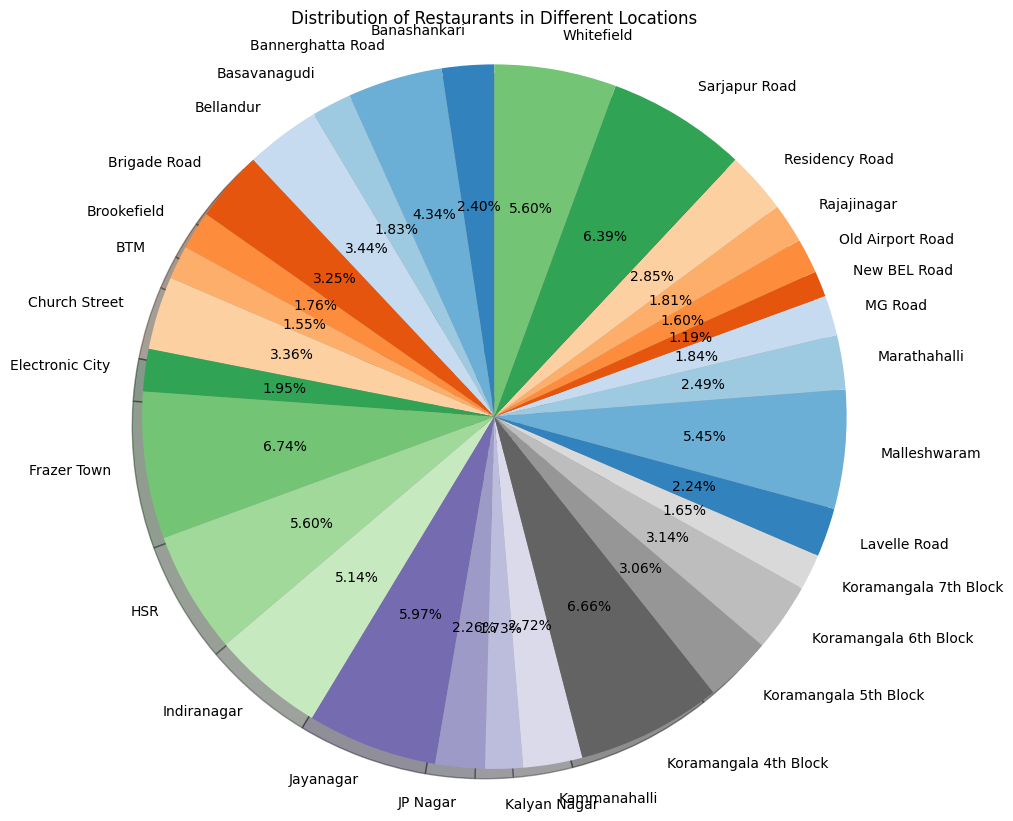

In [51]:
labels = ["Banashankari", "Bannerghatta Road", "Basavanagudi", "Bellandur", "Brigade Road", "Brookefield", "BTM",
          "Church Street", "Electronic City", "Frazer Town", "HSR", "Indiranagar", "Jayanagar", "JP Nagar",
          "Kalyan Nagar", "Kammanahalli", "Koramangala 4th Block", "Koramangala 5th Block", "Koramangala 6th Block",
          "Koramangala 7th Block", "Lavelle Road", "Malleshwaram", "Marathahalli", "MG Road", "New BEL Road",
          "Old Airport Road", "Rajajinagar", "Residency Road", "Sarjapur Road", "Whitefield"]

y = [900, 1630, 685, 1290, 1220, 660, 580, 1260, 730, 2530, 2100, 1930, 2240, 850, 650, 1020, 2500, 1150, 1180, 620,
     840, 2045, 935, 690, 445, 600, 680, 1070, 2400, 2100]

fig, axes1 = plt.subplots(figsize=(10, 10))
colors = plt.cm.tab20c.colors

axes1.pie(y, labels=labels, autopct="%0.2f%%", colors=colors, shadow=True, startangle=90)

axes1.axis("equal")
axes1.set_title('Distribution of Restaurants in Different Locations')

plt.show()


<BarContainer object of 30 artists>

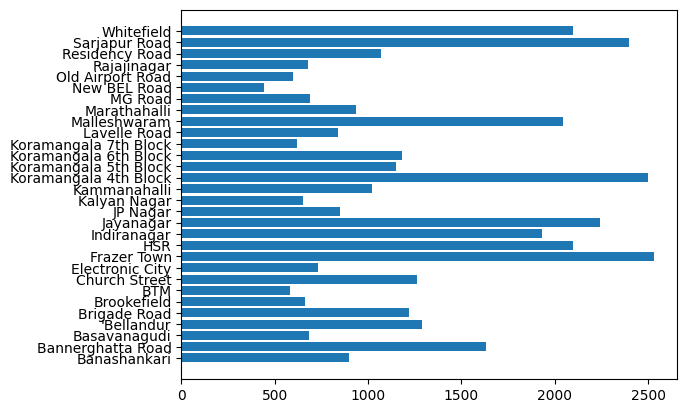

In [52]:
 x = np.array(["Banashankari","Bannerghatta Road","Basavanagudi","'Bellandur","Brigade Road", "Brookefield", "BTM", "Church Street",
              "Electronic City", "Frazer Town", "HSR", "Indiranagar", "Jayanagar","JP Nagar", "Kalyan Nagar", "Kammanahalli",
              "Koramangala 4th Block", "Koramangala 5th Block","Koramangala 6th Block","Koramangala 7th Block","Lavelle Road","Malleshwaram",
              "Marathahalli", "MG Road", "New BEL Road", "Old Airport Road", "Rajajinagar", "Residency Road", "Sarjapur Road","Whitefield"])
y = np.array([900, 1630, 685, 1290, 1220, 660, 580, 1260, 730, 2530, 2100, 1930, 2240, 850, 650, 1020, 2500, 1150, 1180, 620, 840, 2045, 935, 690, 445, 600, 680, 1070, 2400, 2100])
plt.barh(x,y)

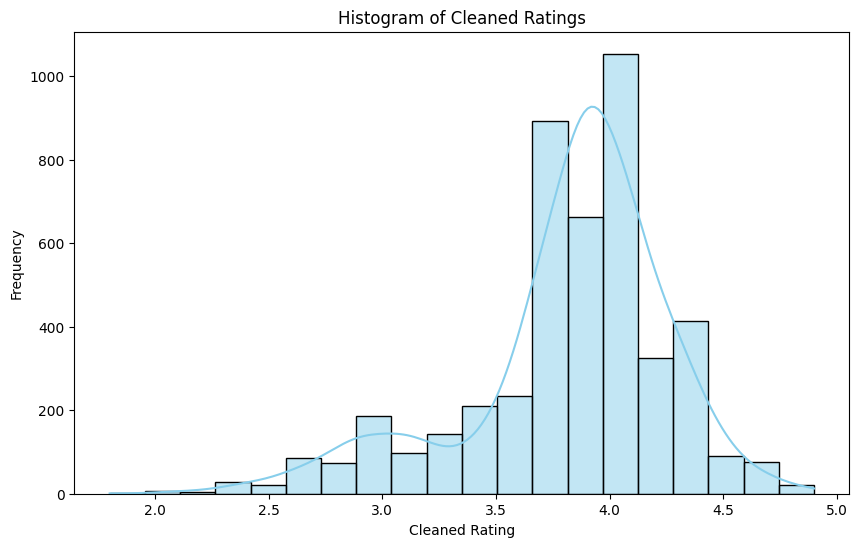

In [53]:
# Histogram for Cleaned Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Cleaned Ratings')
plt.xlabel('Cleaned Rating')
plt.ylabel('Frequency')
plt.show()

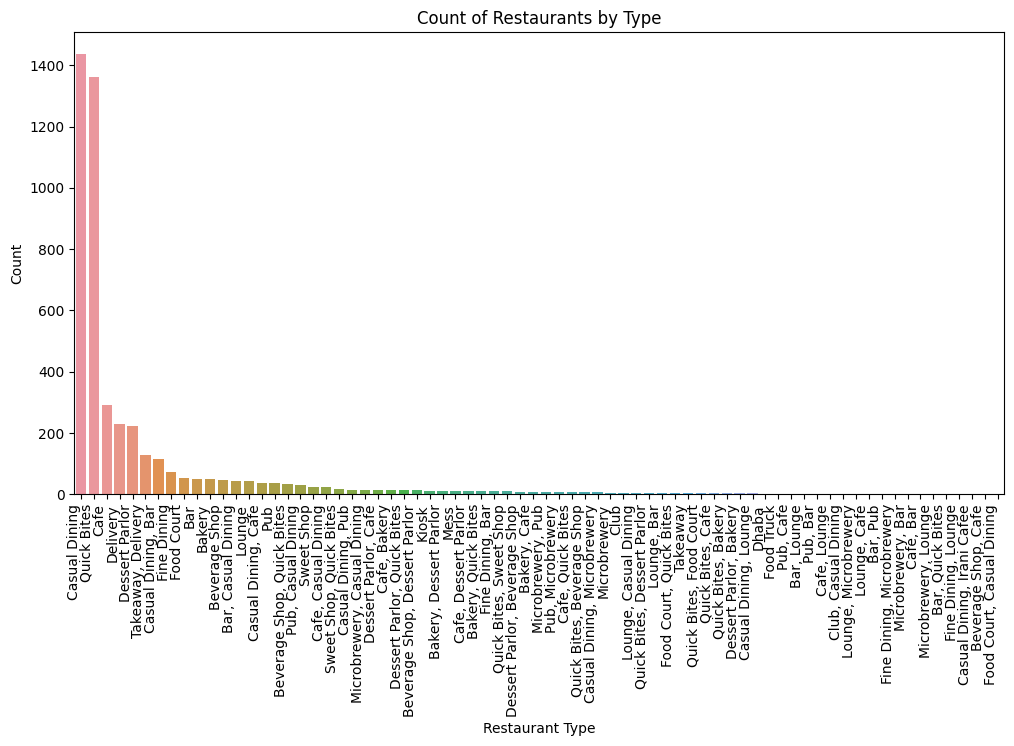

In [54]:
# Count plot for Restaurant Types
plt.figure(figsize=(12, 6))
sns.countplot(x='rest_type', data=df, order=df['rest_type'].value_counts().index)
plt.title('Count of Restaurants by Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()


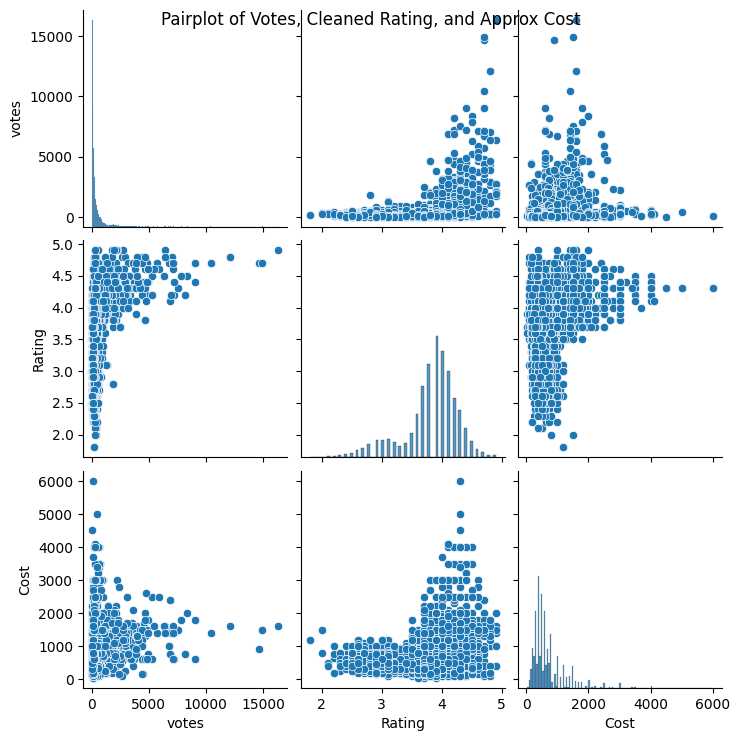

In [55]:
# Pairplot
sns.pairplot(df[['votes', 'Rating', 'Cost']])
plt.suptitle('Pairplot of Votes, Cleaned Rating, and Approx Cost')
plt.show()

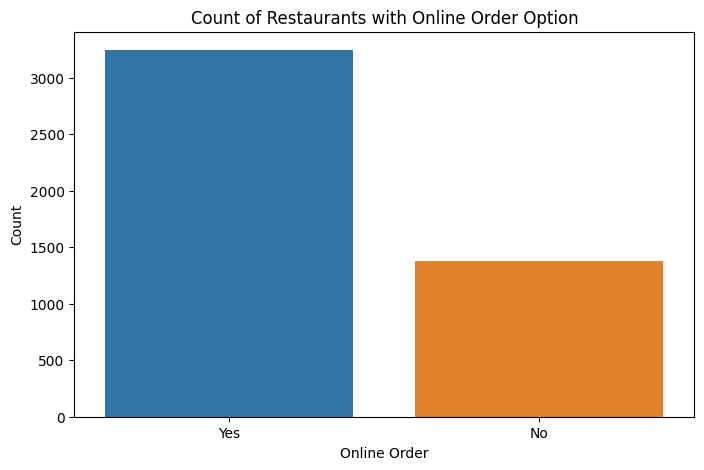

In [56]:
# Bar plot for Online Order
plt.figure(figsize=(8, 5))
sns.countplot(x='online_order', data=df)
plt.title('Count of Restaurants with Online Order Option')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Cleaned Rating')

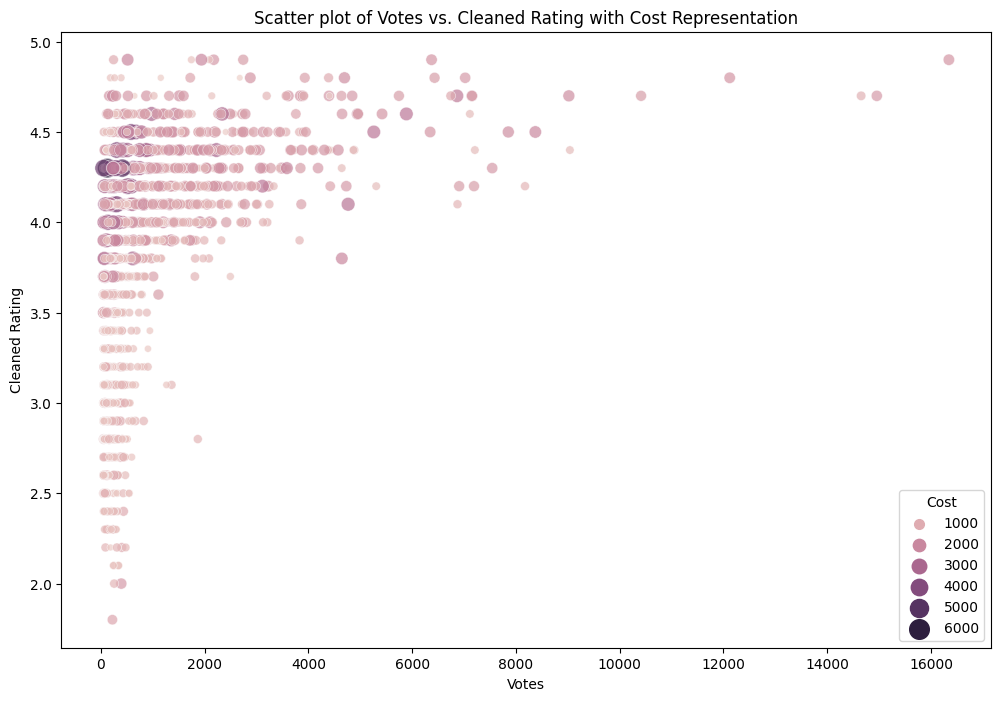

In [57]:
# Scatter plot with color representation of 'approx_cost(for two people)'
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='votes', y='Rating', hue='Cost', size='Cost', sizes=(20, 200), data=df, alpha=0.7)
plt.title('Scatter plot of Votes vs. Cleaned Rating with Cost Representation')
plt.xlabel('Votes')
plt.ylabel('Cleaned Rating')

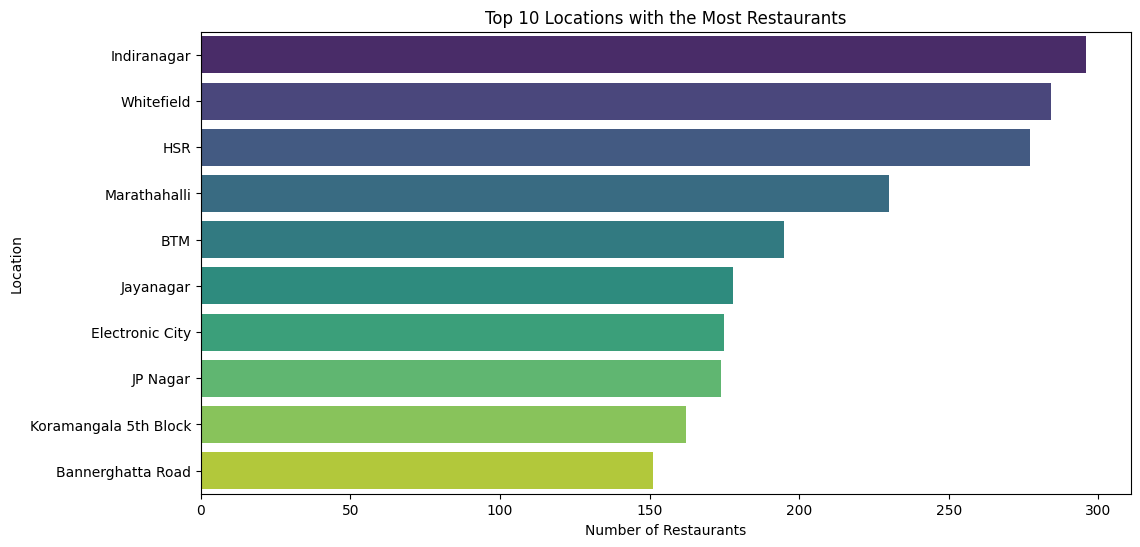

In [58]:
# Bar graph for Top 10 Locations
plt.figure(figsize=(12, 6))
top_locations = df['location'].value_counts().nlargest(10)
sns.barplot(x=top_locations, y=top_locations.index, palette='viridis')
plt.title('Top 10 Locations with the Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()

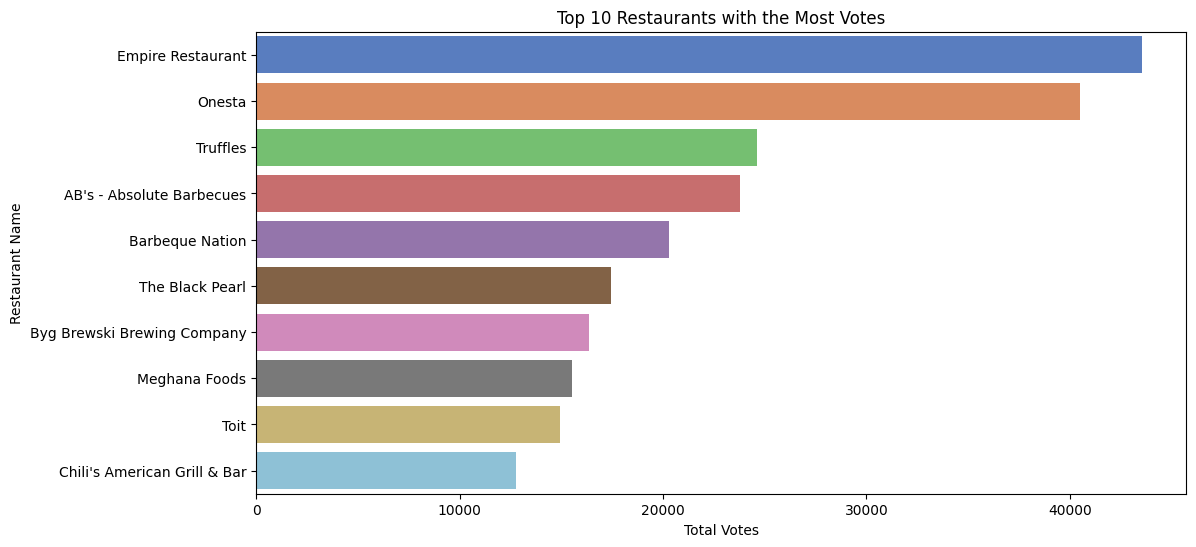

In [59]:
# Bar graph for Top 10 Restaurants based on Votes
plt.figure(figsize=(12, 6))
top_restaurants = df.groupby('name')['votes'].sum().nlargest(10)
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='muted')
plt.title('Top 10 Restaurants with the Most Votes')
plt.xlabel('Total Votes')
plt.ylabel('Restaurant Name')
plt.show()


# **Model** **Building**

In [60]:
df['tags'] = df['rest_type']+df['cuisines']+df['reviews_list']

<ipython-input-60-e9ca9d35c4f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['rest_type']+df['cuisines']+df['reviews_list']


In [61]:
filtered_res=df[['name','location','address','online_order','book_table','phone','rest_type','Cost','Rating','Mean Rating','tags']].reset_index(drop=True)

In [62]:
filtered_res.rest_type

0             Casual Dining
1             Casual Dining
2       Cafe, Casual Dining
3               Quick Bites
4             Casual Dining
               ...         
4620          Casual Dining
4621                    Bar
4622          Casual Dining
4623             Food Court
4624     Casual Dining, Bar
Name: rest_type, Length: 4625, dtype: object

In [63]:
filtered_res.shape

(4625, 11)

In [64]:
filtered_res['name']=filtered_res['name'].str.lower()

In [65]:
filtered_res

,name,location,address,online_order,book_table,phone,rest_type,Cost,Rating,Mean Rating,tags
0,jalsa,Banashankari,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,080 42297555\r\n+91 9743772233,Casual Dining,800,4.1,3.99,"Casual DiningNorth Indian, Mughlai, Chineserat..."
1,spice elephant,Banashankari,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,080 41714161,Casual Dining,800,4.1,3.97,"Casual DiningChinese, North Indian, Thairated ..."
2,san churro cafe,Banashankari,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,+91 9663487993,"Cafe, Casual Dining",800,3.8,3.58,"Cafe, Casual DiningCafe, Mexican, Italianrated..."
3,addhuri udupi bhojana,Banashankari,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,+91 9620009302,Quick Bites,300,3.7,3.45,"Quick BitesSouth Indian, North Indianrated 40 ..."
4,grand village,Basavanagudi,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,+91 8026612447\r\n+91 9901210005,Casual Dining,600,3.8,3.58,"Casual DiningNorth Indian, Rajasthanirated 40 ..."
...,...,...,...,...,...,...,...,...,...,...,...
4620,chianti,"ITPL Main Road, Whitefield","1, Ground Floor, Ascendas Park Square Mall, Wh...",No,Yes,+91 8061224716\n+91 8061224717,Casual Dining,1500,4.6,4.59,Casual DiningItalianrated 40 ratedn had visit...
4621,chime - sheraton grand bengaluru whitefield ho...,"ITPL Main Road, Whitefield",Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,Yes,080 49652769,Bar,2500,4.3,4.23,BarFinger Foodrated 40 ratedn nice and friend...
4622,chung wah,"ITPL Main Road, Whitefield","Unit 04-01, 4th floor, Ascendas Park Square Ma...",No,No,+91 9535948061,Casual Dining,800,2.5,3.52,"Casual DiningChinese, Momosrated 10 ratedn fo..."
4623,fujian express,"ITPL Main Road, Whitefield","Food Court, Ascendas Park Square Mall, Whitefi...",Yes,No,+91 7760075458\n+91 9591852291,Food Court,600,3.8,3.14,"Food CourtThai, Chinese, Momosrated 40 ratedn ..."


In [66]:
filtered_res.duplicated().sum()

0

In [67]:
filtered_res['tags'][0]

'Casual DiningNorth Indian, Mughlai, Chineserated 40 ratedn  a beautiful place to dine inthe interiors take you back to the mughal era the lightings are just perfectwe went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at allthe only complaint is that the breads could have been betterwould surely like to come here again rated 40 ratedn  i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangoutncheers rated 20 ratedn  its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by

In [68]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [71]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [72]:
filtered_res['tags']=filtered_res['tags'].apply(stem)

In [73]:
filtered_res['tags'][0]

'casual diningnorth indian, mughlai, chineser 40 ratedn a beauti place to dine inth interior take you back to the mughal era the light are just perfectw went there on the occas of christma and so they had onli limit item avail but the tast and servic wa not compromis at allth onli complaint is that the bread could have been betterwould sure like to come here again rate 40 ratedn i wa here for dinner with my famili on a weekday the restaur wa complet empti ambienc is good with some good old hindi music seat arrang are good too we order masala papad panner and babi corn starter lemon and corriond soup butter roti oliv and chilli paratha food wa fresh and good servic is good too good for famili hangoutnch rate 20 ratedn it a restaur near to banashankari bda me along with few of my offic friend visit to have buffet but unfortun they onli provid veg buffet on inquir they said thi place is mostli visit by vegetarian anyway we order ala cart item which took age to come food wa ok ok definit n

In [74]:
cv=CountVectorizer(max_features=10000,stop_words='english')

In [75]:
vector = cv.fit_transform(filtered_res['tags']).toarray()

In [76]:
cv.get_feature_names_out()

array(['01dec2018', '05', '10', ..., 'â¼ã', 'â½ã', 'â¾ã'], dtype=object)

In [77]:
from sklearn.metrics.pairwise import cosine_similarity

In [78]:
similarity = cosine_similarity(vector)

In [79]:
similarity

array([[1.        , 0.71409206, 0.67992868, ..., 0.60620507, 0.55054907,
        0.5665704 ],
       [0.71409206, 1.        , 0.7662401 , ..., 0.39199556, 0.66116738,
        0.34694076],
       [0.67992868, 0.7662401 , 1.        , ..., 0.45516046, 0.55698884,
        0.42009166],
       ...,
       [0.60620507, 0.39199556, 0.45516046, ..., 1.        , 0.36602726,
        0.80926083],
       [0.55054907, 0.66116738, 0.55698884, ..., 0.36602726, 1.        ,
        0.26500327],
       [0.5665704 , 0.34694076, 0.42009166, ..., 0.80926083, 0.26500327,
        1.        ]])

In [80]:
similarity.shape

(4625, 4625)

In [81]:
filtered_res_out=filtered_res[['name','location','address','online_order','book_table','phone','rest_type','Cost','Rating','Mean Rating']].reset_index(drop=True)

In [82]:
filtered_res_out["name"]=filtered_res_out["name"].apply(lambda text: remove_punctuation(text))
filtered_res_out["name"]=filtered_res_out["name"].str.replace(' ', '')

In [83]:
filtered_res_out

,name,location,address,online_order,book_table,phone,rest_type,Cost,Rating,Mean Rating
0,jalsa,Banashankari,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,080 42297555\r\n+91 9743772233,Casual Dining,800,4.1,3.99
1,spiceelephant,Banashankari,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,080 41714161,Casual Dining,800,4.1,3.97
2,sanchurrocafe,Banashankari,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,+91 9663487993,"Cafe, Casual Dining",800,3.8,3.58
3,addhuriudupibhojana,Banashankari,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,+91 9620009302,Quick Bites,300,3.7,3.45
4,grandvillage,Basavanagudi,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,+91 8026612447\r\n+91 9901210005,Casual Dining,600,3.8,3.58
...,...,...,...,...,...,...,...,...,...,...
4620,chianti,"ITPL Main Road, Whitefield","1, Ground Floor, Ascendas Park Square Mall, Wh...",No,Yes,+91 8061224716\n+91 8061224717,Casual Dining,1500,4.6,4.59
4621,chimesheratongrandbengaluruwhitefieldhotel,"ITPL Main Road, Whitefield",Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,Yes,080 49652769,Bar,2500,4.3,4.23
4622,chungwah,"ITPL Main Road, Whitefield","Unit 04-01, 4th floor, Ascendas Park Square Ma...",No,No,+91 9535948061,Casual Dining,800,2.5,3.52
4623,fujianexpress,"ITPL Main Road, Whitefield","Food Court, Ascendas Park Square Mall, Whitefi...",Yes,No,+91 7760075458\n+91 9591852291,Food Court,600,3.8,3.14


In [84]:
filtered_res_out.rest_type = filtered_res_out.rest_type.apply(lambda text: remove_punctuation(text))

In [85]:
filtered_res_out.rest_type

0            Casual Dining
1            Casual Dining
2       Cafe Casual Dining
3              Quick Bites
4            Casual Dining
               ...        
4620         Casual Dining
4621                   Bar
4622         Casual Dining
4623            Food Court
4624     Casual Dining Bar
Name: rest_type, Length: 4625, dtype: object

In [86]:
output=filtered_res[['name','location','Rating','Cost','rest_type','book_table','online_order','phone','address']]

In [87]:
output

,name,location,Rating,Cost,rest_type,book_table,online_order,phone,address
0,jalsa,Banashankari,4.1,800,Casual Dining,Yes,Yes,080 42297555\r\n+91 9743772233,"942, 21st Main Road, 2nd Stage, Banashankari, ..."
1,spice elephant,Banashankari,4.1,800,Casual Dining,No,Yes,080 41714161,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ..."
2,san churro cafe,Banashankari,3.8,800,"Cafe, Casual Dining",No,Yes,+91 9663487993,"1112, Next to KIMS Medical College, 17th Cross..."
3,addhuri udupi bhojana,Banashankari,3.7,300,Quick Bites,No,No,+91 9620009302,"1st Floor, Annakuteera, 3rd Stage, Banashankar..."
4,grand village,Basavanagudi,3.8,600,Casual Dining,No,No,+91 8026612447\r\n+91 9901210005,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza..."
...,...,...,...,...,...,...,...,...,...
4620,chianti,"ITPL Main Road, Whitefield",4.6,1500,Casual Dining,Yes,No,+91 8061224716\n+91 8061224717,"1, Ground Floor, Ascendas Park Square Mall, Wh..."
4621,chime - sheraton grand bengaluru whitefield ho...,"ITPL Main Road, Whitefield",4.3,2500,Bar,Yes,No,080 49652769,Sheraton Grand Bengaluru Whitefield Hotel & Co...
4622,chung wah,"ITPL Main Road, Whitefield",2.5,800,Casual Dining,No,No,+91 9535948061,"Unit 04-01, 4th floor, Ascendas Park Square Ma..."
4623,fujian express,"ITPL Main Road, Whitefield",3.8,600,Food Court,No,Yes,+91 7760075458\n+91 9591852291,"Food Court, Ascendas Park Square Mall, Whitefi..."


In [88]:
popularity_output=filtered_res[['name','location','Rating','Mean Rating','Cost','rest_type','book_table','online_order','phone','address']]

In [89]:
#location
popularity = popularity_output[popularity_output['Rating'] > 4].sort_values(by='Mean Rating', ascending=False).reset_index(drop=True)
# popularity.drop('Mean ',axis=1,inplace=True)

In [90]:
def recommend_main(res,loc,res_type):
  punc_to_remove = string.punctuation
  res = res.translate(str.maketrans('', '', punc_to_remove))
  res = res.replace(' ', '')
  res=res.lower()
  if res!='all' and res not in filtered_res_out['name'].unique():
    res_output = pd.DataFrame()
    return res_output #print("Data Not Available")
  elif(loc=='all' and res_type=='all'):
    res_output = pd.DataFrame()
    matching_res=filtered_res_out[filtered_res_out['name']==res]
    if not matching_res.empty:
      index = matching_res.index[0:]
      if len(index)>0:
        print(f"{len(index)} {res} restaurants is available in different location")
        for i in range(len(index)):
          location=filtered_res['location'][index[i]]
          print(f"{res} at {location}")
          distance=sorted(list(enumerate(similarity[index[i]])),reverse=True,key=lambda x:x[1])
          print()
          for i in distance[0:6]:
            temp_df = output.iloc[i[0]]
            temp_res = pd.DataFrame({
                'name': [temp_df['name']],
                'location': [temp_df['location']],
                'rating': [temp_df['Rating']],
                'cost': [temp_df['Cost']],
                'rest_type': [temp_df['rest_type']],
                'book_table': [temp_df['book_table']],
                'online_order': [temp_df['online_order']],
                'phone': [temp_df['phone']],
                'address': [temp_df['address']]
                })
            res_output = pd.concat([res_output, temp_res], ignore_index=True)
        return res_output
      else:
        return res_output
  elif(res=='all' and res_type=='all'):
    res_output = pd.DataFrame()
    top5=popularity[popularity['location']==loc][:6]
    # for i in range(len(top5)):
    #   print(top5.iloc[i])
    #   print()
    for i in range(len(top5)):
      temp_df = top5.iloc[i]
      temp_res = pd.DataFrame({
          'name': [temp_df['name']],
          'location': [temp_df['location']],
          'rating': [temp_df['Rating']],
          'cost': [temp_df['Cost']],
          'rest_type': [temp_df['rest_type']],
          'book_table': [temp_df['book_table']],
          'online_order': [temp_df['online_order']],
          'phone': [temp_df['phone']],
          'address': [temp_df['address']]
          })
      res_output = pd.concat([res_output, temp_res], ignore_index=True)
    return res_output
  elif(res !='all' and res_type == 'all'):
    res_output = pd.DataFrame()
    detail=popularity[(popularity['location'] == loc) & (popularity['name'] == res)]
    # print(detail.iloc[0, 0:])
    # print()
    # print("Related_restaurants")
    # print()
    # # res_output=detail
    temp=detail.iloc[0, 0:]
    det_tem=pd.DataFrame({
              'name': [temp['name']],
              'location': [temp['location']],
              'rating': [temp['Rating']],
              'cost': [temp['Cost']],
              'rest_type': [temp['rest_type']],
              'book_table': [temp['book_table']],
              'online_order': [temp['online_order']],
              'phone': [temp['phone']],
              'address': [temp['address']]
              })
    res_output = pd.concat([res_output, det_tem], ignore_index=True)
    matching_res=filtered_res_out[(filtered_res_out['location'] == loc) & (filtered_res_out['name'] == res)]
    if not matching_res.empty:
      index = matching_res.index[0]
      distance=sorted(list(enumerate(similarity[index])),reverse=True,key=lambda x:x[1])
      # for i in distance[1:6]:
      #   print()
      #   print(output.iloc[i[0]])
      for i in distance[1:6]:
        temp_df = output.iloc[i[0]]
        temp_res = pd.DataFrame({
            'name': [temp_df['name']],
            'location': [temp_df['location']],
            'rating': [temp_df['Rating']],
            'cost': [temp_df['Cost']],
            'rest_type': [temp_df['rest_type']],
            'book_table': [temp_df['book_table']],
            'online_order': [temp_df['online_order']],
            'phone': [temp_df['phone']],
            'address': [temp_df['address']]
            })
        res_output = pd.concat([res_output, temp_res], ignore_index=True)
      return res_output
    else:
      return 0                                                     # 1 means return nothing there no res in the location
  elif(res == 'all' and loc != 'all' and res_type!='all'):
    res_output = pd.DataFrame()
    res_loc_det=popularity[(popularity['location'] == loc) & (popularity['rest_type'].isin([res_type]))]
    if not res_loc_det.empty:
        for i in range(0,len(res_loc_det)):
            temp_df = res_loc_det.iloc[i]
            temp_res = pd.DataFrame({
                'name': [temp_df['name']],
                'location': [temp_df['location']],
                'rating': [temp_df['Rating']],
                'cost': [temp_df['Cost']],
                'rest_type': [temp_df['rest_type']],
                'book_table': [temp_df['book_table']],
                'online_order': [temp_df['online_order']],
                'phone': [temp_df['phone']],
                'address': [temp_df['address']]
                })
            res_output = pd.concat([res_output, temp_res], ignore_index=True)
        return res_output
    else:
        top5=popularity[popularity['location']==loc][:10]
        for i in range(len(top5)):
            temp_df = top5.iloc[i]
            temp_res = pd.DataFrame({
                'name': [temp_df['name']],
                'location': [temp_df['location']],
                'rating': [temp_df['Rating']],
                'cost': [temp_df['Cost']],
                'rest_type': [temp_df['rest_type']],
                'book_table': [temp_df['book_table']],
                'online_order': [temp_df['online_order']],
                'phone': [temp_df['phone']],
                'address': [temp_df['address']]
                })
            res_output = pd.concat([res_output, temp_res], ignore_index=True)
        return res_output
  else:
    print("invalid Input")

In [91]:
recommend_main('the hidden home', 'all', 'all')

1 thehiddenhome restaurants is available in different location
thehiddenhome at Sarjapur Road



,name,location,rating,cost,rest_type,book_table,online_order,phone,address
0,the hidden home,Sarjapur Road,4.3,1300,Casual Dining,Yes,Yes,080 49653432,"82/4B, Next To Wipro Corporate Office, Sarjapu..."
1,vapour brewpub and diner,Sarjapur Road,4.6,1400,"Microbrewery, Pub",Yes,No,080 49653047,"7th Floor, Bren Mercury, Kaikondrahalli Juncti..."
2,1131 bar + kitchen,Indiranagar,4.6,1500,"Bar, Casual Dining",Yes,No,080 49652166,"100 Feet Road, HAL 2nd Stage, Indiranagar, Ban..."
3,hammered,Cunningham Road,4.7,1300,"Pub, Cafe",Yes,Yes,+91 8041217527\r\n+91 7618729481,"18, Ali Askar Road, Cunningham Road, Bangalore"
4,nouvelle garden,JP Nagar,3.7,900,Casual Dining,No,No,+91 9900022134\r\n+91 9900022136,"The Ambient Turret, 35/A, 1st Main Road, 3rd P..."
5,shift,HSR,4.2,1500,"Lounge, Casual Dining",Yes,Yes,080 49653439,"1085, 14th Main, 18th Cross, Sector 3, HSR, Ba..."


In [92]:
recommend_main('Jalsa', 'all', 'all')

2 jalsa restaurants is available in different location
jalsa at Banashankari

jalsa at Marathahalli



,name,location,rating,cost,rest_type,book_table,online_order,phone,address
0,jalsa,Banashankari,4.1,800,Casual Dining,Yes,Yes,080 42297555\r\n+91 9743772233,"942, 21st Main Road, 2nd Stage, Banashankari, ..."
1,jalsa gold,Marathahalli,4.5,1300,Casual Dining,Yes,No,+91 9066887021\r\n+91 7022455300,"20\5, Panathur Junction, Outer Ring Road, Kadu..."
2,the hidden home,Sarjapur Road,4.3,1300,Casual Dining,Yes,Yes,080 49653432,"82/4B, Next To Wipro Corporate Office, Sarjapu..."
3,sidewalk - the garden bar,Marathahalli,4.5,1300,"Bar, Casual Dining",Yes,Yes,+91 9591325180\r\n+91 9999266306,"Ground Floor, Soul Space Paradigm, Next to Inn..."
4,foxtrot,Marathahalli,4.4,1200,"Pub, Casual Dining",Yes,Yes,+91 9108136001\r\n+91 9108136003,"89/1, Monnekollal Village, Varthur Hobli, Oute..."
5,hangover,HSR,4.3,1500,"Bar, Casual Dining",Yes,Yes,080 49652578,"2324, 17th Cross, 27th Main, Opposite Studio P..."
6,jalsa,Marathahalli,4.2,1500,Casual Dining,Yes,Yes,+91 7406617555\r\n+91 7406627555,"25/7, Doddannakundi, Outer Ring Road, Mahadeva..."
7,jalsa gold,Marathahalli,4.5,1300,Casual Dining,Yes,No,+91 9066887021\r\n+91 7022455300,"20\5, Panathur Junction, Outer Ring Road, Kadu..."
8,the hidden home,Sarjapur Road,4.3,1300,Casual Dining,Yes,Yes,080 49653432,"82/4B, Next To Wipro Corporate Office, Sarjapu..."
9,hangover,HSR,4.3,1500,"Bar, Casual Dining",Yes,Yes,080 49652578,"2324, 17th Cross, 27th Main, Opposite Studio P..."


In [93]:
recommend_main('jalsa', 'Marathahalli', 'all')

,name,location,rating,cost,rest_type,book_table,online_order,phone,address
0,jalsa,Marathahalli,4.2,1500,Casual Dining,Yes,Yes,+91 7406617555\r\n+91 7406627555,"25/7, Doddannakundi, Outer Ring Road, Mahadeva..."
1,jalsa gold,Marathahalli,4.5,1300,Casual Dining,Yes,No,+91 9066887021\r\n+91 7022455300,"20\5, Panathur Junction, Outer Ring Road, Kadu..."
2,the hidden home,Sarjapur Road,4.3,1300,Casual Dining,Yes,Yes,080 49653432,"82/4B, Next To Wipro Corporate Office, Sarjapu..."
3,hangover,HSR,4.3,1500,"Bar, Casual Dining",Yes,Yes,080 49652578,"2324, 17th Cross, 27th Main, Opposite Studio P..."
4,bombay brasserie,Bellandur,4.3,1800,Casual Dining,No,Yes,+91 9513347399\r\n+91 8046834444,"International Bay, Campus 8/A, RMZ Ecoworld, B..."
5,hammered,Cunningham Road,4.7,1300,"Pub, Cafe",Yes,Yes,+91 8041217527\r\n+91 7618729481,"18, Ali Askar Road, Cunningham Road, Bangalore"


In [94]:
res=recommend_main('all','Marathahalli','Casual Dining')

In [95]:
recommend_main('all', 'Marathahalli', 'all')

,name,location,rating,cost,rest_type,book_table,online_order,phone,address
0,flechazo,Marathahalli,4.7,1400,Casual Dining,Yes,No,+91 7829999491\n+91 7829999492,"9/1, 1st Floor, Above Surya Nissan, VRR Orchid..."
1,ab's - absolute barbecues,Marathahalli,4.8,1600,Casual Dining,Yes,No,080 49652574,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly..."
2,the black pearl,Marathahalli,4.8,1500,"Casual Dining, Bar",Yes,No,080 49653069,"20/7, Swamy Legato, Outer Ring Road, Kadubeesa..."
3,the boozy griffin,Marathahalli,4.8,1800,Pub,Yes,No,080 45128669,"20/7, 4th & 5th Floor, Swamy Legato, Outer Rin..."
4,brew and barbeque - a microbrewery pub,Marathahalli,4.7,1400,"Microbrewery, Pub",Yes,Yes,080 45128649,"36/4, Fourth Floor, Soul Space Arena, Outer Ri..."
5,dock frost'd,Marathahalli,4.6,400,"Beverage Shop, Dessert Parlor",No,Yes,080 48904890,"Sriven Square Building, Ground Floor, Near Kun..."


In [96]:
recommend_main('jalsa','all','all')

2 jalsa restaurants is available in different location
jalsa at Banashankari

jalsa at Marathahalli



,name,location,rating,cost,rest_type,book_table,online_order,phone,address
0,jalsa,Banashankari,4.1,800,Casual Dining,Yes,Yes,080 42297555\r\n+91 9743772233,"942, 21st Main Road, 2nd Stage, Banashankari, ..."
1,jalsa gold,Marathahalli,4.5,1300,Casual Dining,Yes,No,+91 9066887021\r\n+91 7022455300,"20\5, Panathur Junction, Outer Ring Road, Kadu..."
2,the hidden home,Sarjapur Road,4.3,1300,Casual Dining,Yes,Yes,080 49653432,"82/4B, Next To Wipro Corporate Office, Sarjapu..."
3,sidewalk - the garden bar,Marathahalli,4.5,1300,"Bar, Casual Dining",Yes,Yes,+91 9591325180\r\n+91 9999266306,"Ground Floor, Soul Space Paradigm, Next to Inn..."
4,foxtrot,Marathahalli,4.4,1200,"Pub, Casual Dining",Yes,Yes,+91 9108136001\r\n+91 9108136003,"89/1, Monnekollal Village, Varthur Hobli, Oute..."
5,hangover,HSR,4.3,1500,"Bar, Casual Dining",Yes,Yes,080 49652578,"2324, 17th Cross, 27th Main, Opposite Studio P..."
6,jalsa,Marathahalli,4.2,1500,Casual Dining,Yes,Yes,+91 7406617555\r\n+91 7406627555,"25/7, Doddannakundi, Outer Ring Road, Mahadeva..."
7,jalsa gold,Marathahalli,4.5,1300,Casual Dining,Yes,No,+91 9066887021\r\n+91 7022455300,"20\5, Panathur Junction, Outer Ring Road, Kadu..."
8,the hidden home,Sarjapur Road,4.3,1300,Casual Dining,Yes,Yes,080 49653432,"82/4B, Next To Wipro Corporate Office, Sarjapu..."
9,hangover,HSR,4.3,1500,"Bar, Casual Dining",Yes,Yes,080 49652578,"2324, 17th Cross, 27th Main, Opposite Studio P..."


In [97]:
recommend_main('all','HSR','Bar')

,name,location,rating,cost,rest_type,book_table,online_order,phone,address
0,house of commons,HSR,4.7,1000,Bar,Yes,No,080 45128819,"1085, 14th Main, 18th Cross, Sector 3, HSR, Ba..."


In [98]:
import pickle

In [99]:
pickle.dump(filtered_res,open('filtered_res.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(popularity,open('popularity.pkl','wb'))
pickle.dump(output,open('output.pkl','wb'))

In [100]:
pickle.dump(recommend_main,open('recommend_main.pkl','wb'))

In [101]:
pickle.dump(filtered_res_out,open('filtered_res_out.pkl','wb'))